# ANALYSIS OF URBAN COMPANY

## 2. DATA CLEANING

In [38]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
data=pd.read_excel("shama_final_output.xlsx")

In [40]:
data.head()

,Unnamed: 0,Unnamed: 0.1,Dates,Names,Ratings,Services,City,Counrty,Comments
0,0,0.0,"30 March, 2022",Jayashree Chauhan,5.0,None,None,None,None
1,1,1.0,"30 March, 2022",Rajalakshmi Sampath,5.0,None,None,None,None
2,2,2.0,"30 March, 2022",Venkat Reddy,5.0,AC Service and Repair Professionals,Hyderabad,India,AC Service and Repair Professionals in Hyderab...
3,3,3.0,"30 March, 2022",Shilpa,5.0,None,None,None,None
4,4,4.0,"30 March, 2022",Saurabh shingnapurkar,5.0,AC Service and Repair Professionals,Mumbai,India,"AC Service and Repair Professionals in Mumbai,..."


In [41]:
#replacing counrty to country
data.rename(columns={'Counrty':'Country'},inplace='true')

In [42]:
#Checking datatype of each column
data.dtypes

Unnamed: 0        int64
Unnamed: 0.1    float64
Dates            object
Names            object
Ratings         float64
Services         object
City             object
Country          object
Comments         object
dtype: object

In [43]:
#checking information of all column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211892 entries, 0 to 211891
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    211892 non-null  int64  
 1   Unnamed: 0.1  100950 non-null  float64
 2   Dates         211892 non-null  object 
 3   Names         211892 non-null  object 
 4   Ratings       211892 non-null  float64
 5   Services      211892 non-null  object 
 6   City          211892 non-null  object 
 7   Country       211892 non-null  object 
 8   Comments      211892 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 14.5+ MB


In [44]:
#dropping unnamed column
data=data.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1)

In [45]:
#dropping duplicate values
data.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)

In [46]:
#Replacing none with NaN value
data.replace('None',np.nan, inplace=True)

In [47]:
#Droping all null values
data.dropna(inplace=True)

In [48]:
#seperating year,month and ady from date column
data["Dates"] = pd.to_datetime(data["Dates"])
data["Year"] = [date.year for date in data["Dates"]]
data["Month"] = [date.month for date in data["Dates"]]
data["Day"] = [date.day for date in data["Dates"]]

data = data.drop(columns = "Dates")


In [49]:
data['Country'].value_counts()

India                   104603
United Arab Emirates      1022
Name: Country, dtype: int64

In [50]:
#dropping UAE from country as our focus was on India

data = data[data.Country != 'United Arab Emirates']

In [51]:
#Resetting index
data = data.reset_index()


In [52]:
# Droping the non significant columns from the dataframe
data.drop(columns={'Names','index'},axis=1,inplace= True)

In [53]:
data.head()

,Ratings,Services,City,Country,Comments,Year,Month,Day
0,5.0,AC Service and Repair Professionals,Hyderabad,India,AC Service and Repair Professionals in Hyderab...,2022,3,30
1,5.0,AC Service and Repair Professionals,Mumbai,India,"AC Service and Repair Professionals in Mumbai,...",2022,3,30
2,5.0,Beauty Service Professionals,Faridabad,India,"Beauty Service Professionals in Faridabad, India",2022,3,30
3,5.0,Pest Control Services,Hyderabad,India,"Pest Control Services in Hyderabad, India",2022,3,30
4,4.5,Electricians,Bangalore,India,"Electricians in Bangalore, India",2022,3,30


In [54]:
#saving clean data to excel file
data.to_excel("cleaned_data_shama.xlsx") 

In [55]:
# This function returns sentiment value based on the overall ratings from the user
def sentiments(row):
    
    if row['Ratings'] == 3.0 or row['Ratings']==3.5:
        val = 'Average'
    elif row['Ratings'] >= 1.0 and row['Ratings'] < 3.5:
        val = 'Negative'
    elif row['Ratings'] >= 4.0:
        val = 'Positive'
    else:
        val = -1
    return val


# Applying the function in our new column
data['sentiment'] = data.apply(sentiments, axis=1)
data.head()

,Ratings,Services,City,Country,Comments,Year,Month,Day,sentiment
0,5.0,AC Service and Repair Professionals,Hyderabad,India,AC Service and Repair Professionals in Hyderab...,2022,3,30,Positive
1,5.0,AC Service and Repair Professionals,Mumbai,India,"AC Service and Repair Professionals in Mumbai,...",2022,3,30,Positive
2,5.0,Beauty Service Professionals,Faridabad,India,"Beauty Service Professionals in Faridabad, India",2022,3,30,Positive
3,5.0,Pest Control Services,Hyderabad,India,"Pest Control Services in Hyderabad, India",2022,3,30,Positive
4,4.5,Electricians,Bangalore,India,"Electricians in Bangalore, India",2022,3,30,Positive


In [56]:
data.shape

(104603, 9)

## 3. EXPLORATORY DATA ANALYSIS OF THE URBAN COMPANY DATASET

* We perform EDA to leverage visualization tools, summary tables, and hypothesis testing.
* It provide summary level insight into our dataset.
* We can uncover underlying patterns and structures in our data.

### 3.1 DESCRIPTIVE ANALYSIS OF  VARIABLE - RATINGS

In [57]:
data['Ratings'].describe()

count    104603.000000
mean          4.794442
std           0.631126
min           1.000000
25%           5.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: Ratings, dtype: float64

<AxesSubplot:xlabel='Ratings', ylabel='Count'>

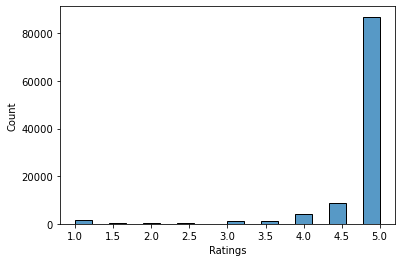

In [58]:
sns.histplot(data.Ratings)

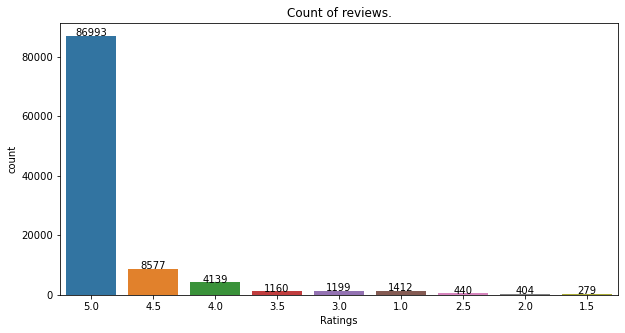

In [59]:
# Printing the number reviews of each type
plt.figure(figsize = (10,5))
plot_order = data.groupby('Ratings')['Ratings'].sum().sort_values(ascending=False).index.values
bars = sns.countplot(x = "Ratings", data = data,order=plot_order)

for bar in bars.patches:
    bars.annotate(text = f"{bar.get_height()}", xy = ((bar.get_x() + bar.get_width()/2), bar.get_height()), ha = "center")

plt.title("Count of reviews.")
plt.show()



### 3.2 ANALYSIS OF CATEGORICAL VARIABLE - CITY

<AxesSubplot:ylabel='Ratings'>

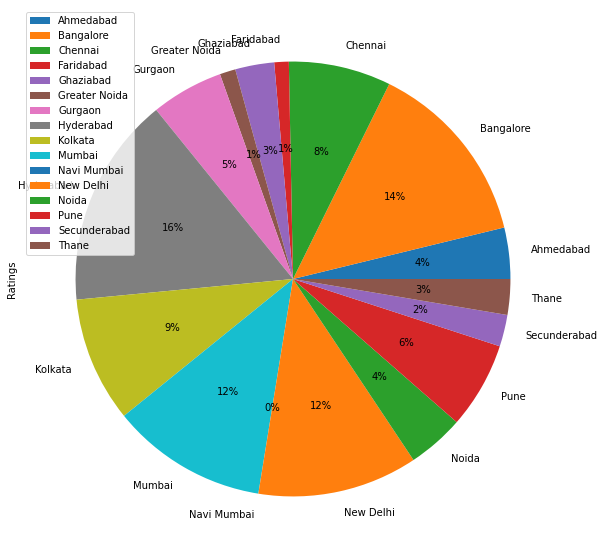

In [60]:
data.groupby(['City']).sum().plot(kind='pie', y='Ratings',figsize=(10,10), autopct='%1.0f%%')


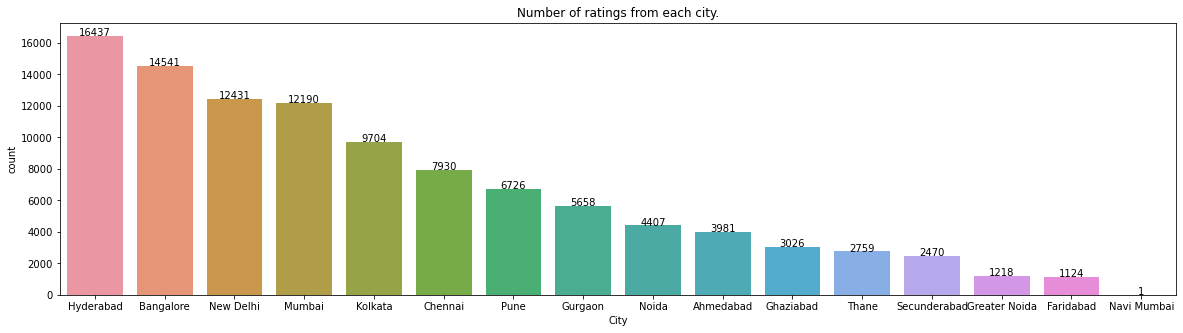

In [61]:
# Printing the number of rating from each city in descending order
plt.figure(figsize = (20,5))
plot_order = data.groupby('City')['Ratings'].sum().sort_values(ascending=False).index.values
bars = sns.countplot(x = "City", data = data,order=plot_order)

for bar in bars.patches:
    bars.annotate(text = f"{bar.get_height()}", xy = ((bar.get_x() + bar.get_width()/2), bar.get_height()), ha = "center")

plt.title("Number of ratings from each city.")
plt.show()



In [62]:
rev_crossdf=pd.crosstab(data['sentiment'], data['City'])

Text(0.5, 1.0, 'no. of reviews in each cities')

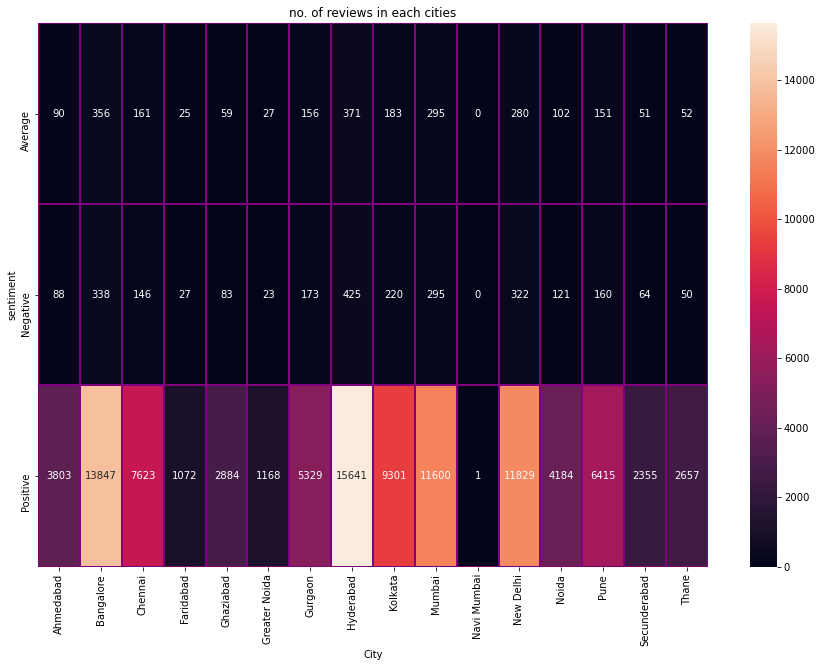

In [63]:
plt.figure(figsize=(15,10))
sns.heatmap(rev_crossdf,annot=True,fmt='d',linewidths=1,linecolor='purple',)
plt.title('no. of reviews in each cities')

### 3. ANALYSIS OF CATEGORICAL VARIABLE - SERVICES

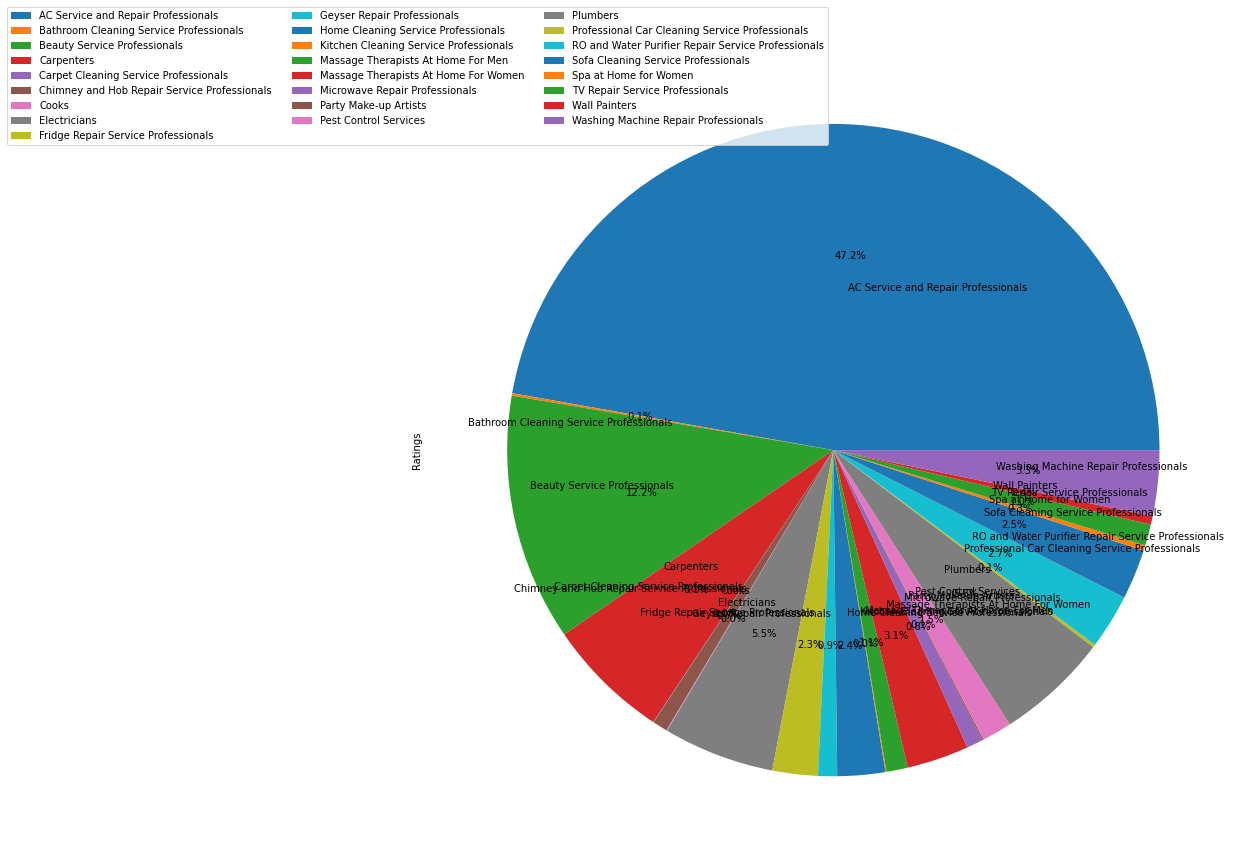

In [64]:

pie=data.groupby(['Services']).sum().plot(kind='pie', y='Ratings' ,figsize=(20,15), autopct='%0.1f%%',labeldistance=0.5)
#below code is used to shift legend 
pie.legend(bbox_to_anchor=(0.5, 1.05),loc='upper right',
      ncol=3, fancybox=True)

# below code can be used to remove legend
#leg = plt.legend()
#ax.get_legend().remove()

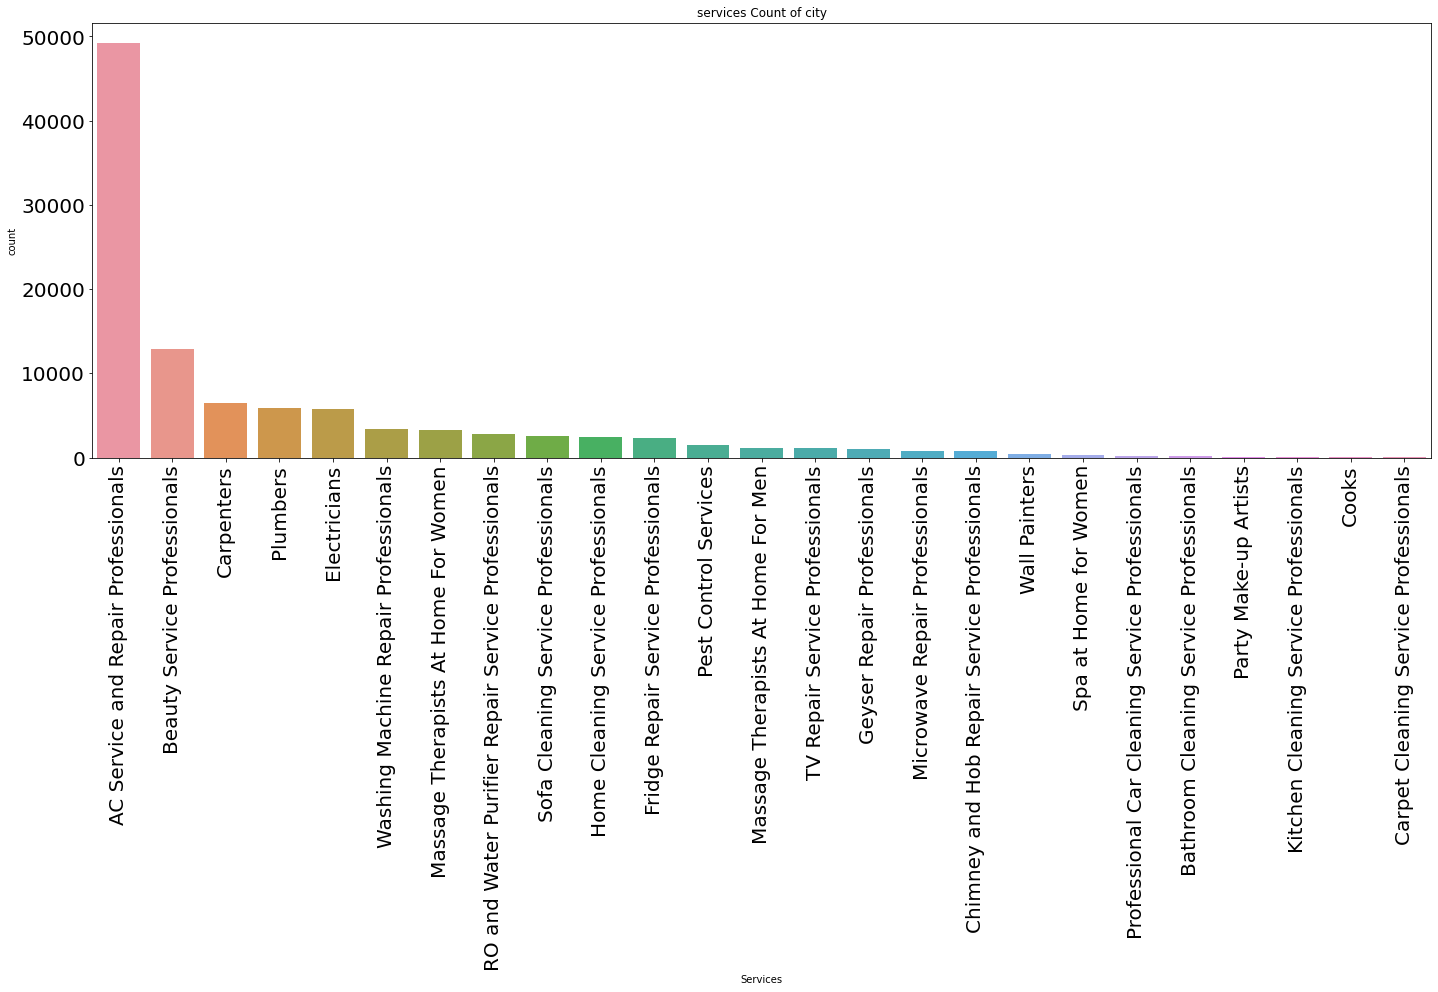

AC Service and Repair Professionals                   49181
Beauty Service Professionals                          12916
Carpenters                                             6463
Plumbers                                               5905
Electricians                                           5772
Washing Machine Repair Professionals                   3376
Massage Therapists At Home For Women                   3240
RO and Water Purifier Repair Service Professionals     2827
Sofa Cleaning Service Professionals                    2588
Home Cleaning Service Professionals                    2469
Fridge Repair Service Professionals                    2348
Pest Control Services                                  1543
Massage Therapists At Home For Men                     1093
TV Repair Service Professionals                        1090
Geyser Repair Professionals                             985
Microwave Repair Professionals                          829
Chimney and Hob Repair Service Professio

In [65]:
#count by Services

plt.subplots(figsize=(24,8))
sns.countplot(x='Services',data=data,order=data['Services'].value_counts().index)
plt.title('services Count of city')
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.show()

print(data['Services'].value_counts())

### 3.4 ANALYSIS OF CATEGORICAL VARIABLE - SENTIMENTS

In [66]:
data['sentiment'].value_counts()

Positive    99709
Negative     2535
Average      2359
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment'>

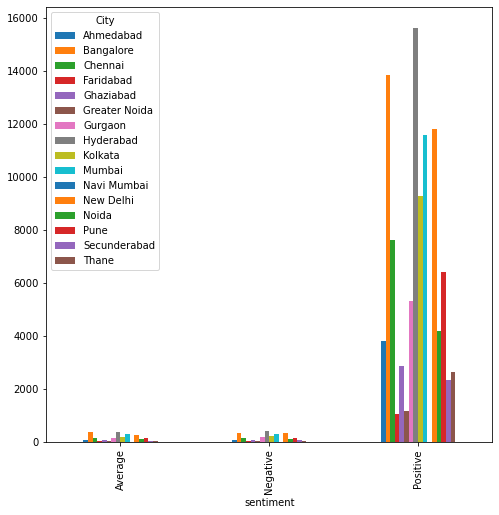

In [67]:
senticountry_table= pd.crosstab(index=data.sentiment,columns=data['City'])
senticountry_table.plot(kind="bar",figsize=(8,8), stacked=False)

<AxesSubplot:ylabel='Ratings'>

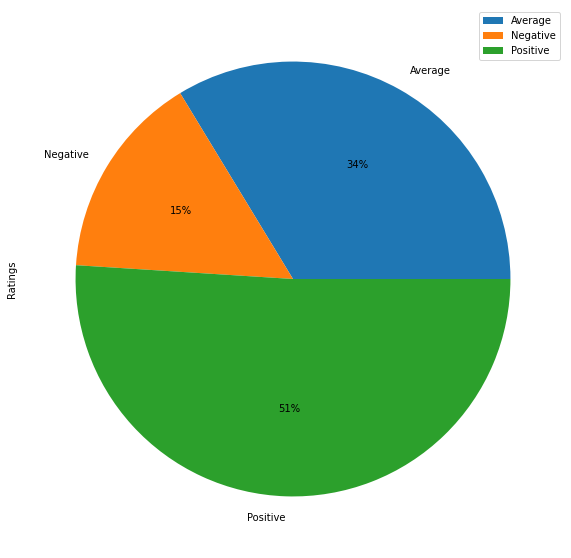

In [68]:
data.groupby(['sentiment']).mean().plot(kind='pie', y='Ratings',figsize=(10,10), autopct='%1.0f%%')

In [69]:
r_crossdf=pd.crosstab(data.Services,data.sentiment,margins=True)

Text(0.5, 1.0, 'no. of Rating in each services')

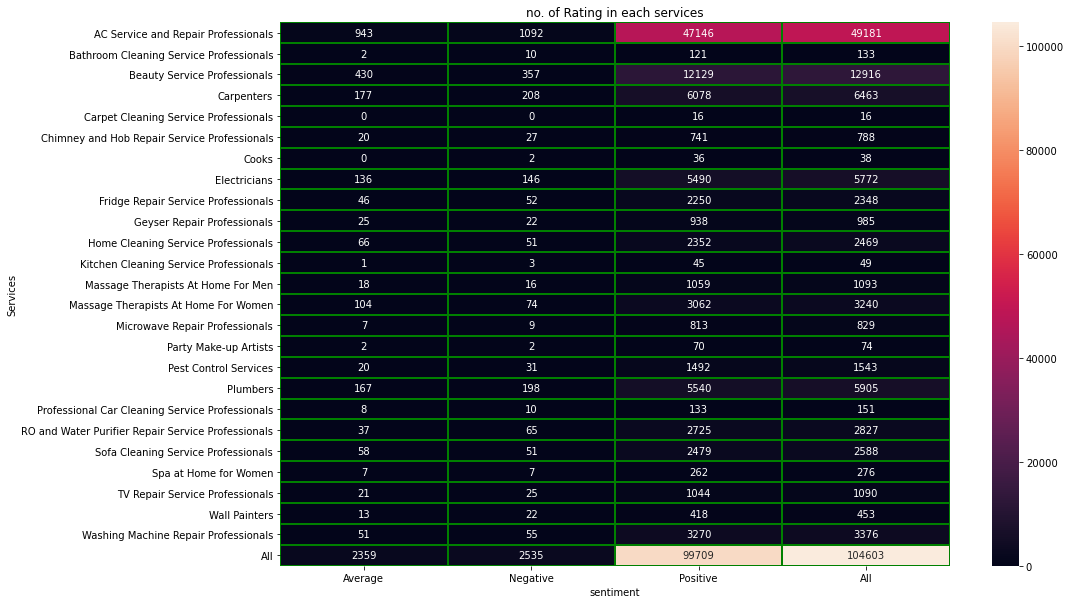

In [70]:
plt.figure(figsize=(15,10))
sns.heatmap(r_crossdf,annot=True,fmt='d',linewidths=1,linecolor='green',)
plt.title('no. of Rating in each services')